Text(0, 0.5, 'Feature 1')

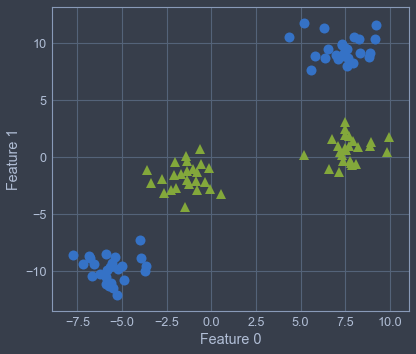

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import sklearn
import mglearn
from matplotlib import pyplot as plt
from numpy import ravel
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs
from jupyterthemes import jtplot
from sklearn.svm import LinearSVC
jtplot.style(theme='onedork')

X, y=make_blobs(centers=4, random_state=8)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

y=y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


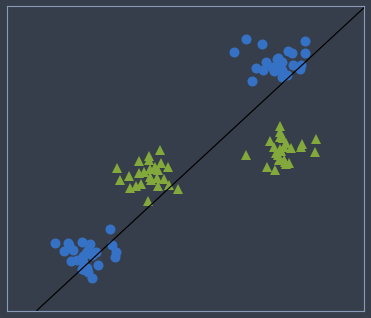

In [20]:
linear_svm=LinearSVC().fit(X, y)                                                      #random_state=0)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0.5, 0, 'feature1 ** 2')

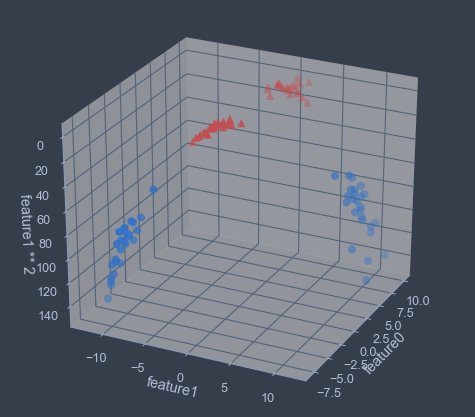

In [34]:
X_new=np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D
figure=plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)

mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0 ** 2')

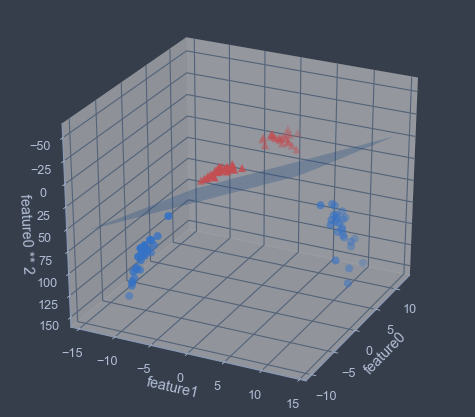

In [35]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

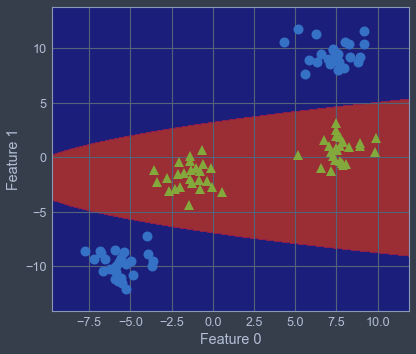

In [37]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

1.0
0.6293706293706294


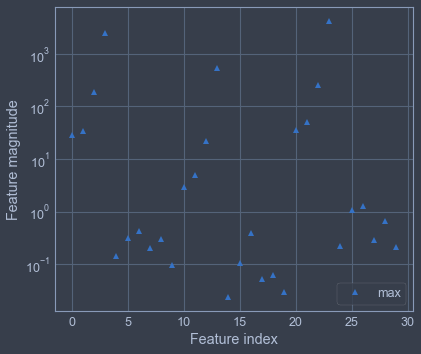

In [48]:
from sklearn.svm import SVC

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(
cancer.data, cancer.target, random_state=0)

svc= SVC().fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

#High feature magnitude, seems like the main problem.
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [50]:
#apply feature rescaling
min_on_training=X_train.min(axis=0)
range_on_training=(X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)), "\n")

X_test_scaled=(X_test-min_on_training)/range_on_training
svc.fit(X_train_scaled, y_train)

print(svc.score(X_test_scaled, y_test))
print(svc.score(X_train_scaled, y_train))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] 

0.951048951048951
0.9483568075117371


In [60]:
svc=SVC(C=1000).fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test), "\n")

svc=SVC(C=1000, gamma=100).fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972 

1.0
0.6293706293706294
